## Anderson Yoshizato - AI&ML - Cohort 10
## Extra Project: Comcast Telecom Consumer Complaints

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Import data into Python environment.

In [2]:
# Importing dataset
telecom_dataset = pd.read_csv(r'C:\Users\ThinkPad\Documents\GitHub\Purdue_PG_AIML\Course3_DSwPython\Project Telecom\Comcast_telecom_complaints_data.csv')

In [3]:
telecom_dataset.head(20)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [4]:
type(telecom_dataset)

pandas.core.frame.DataFrame

In [5]:
telecom_dataset.shape

(2224, 11)

In [6]:
telecom_dataset.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [7]:
# Converting Date object into datetime64 
telecom_dataset['Date'] = pd.to_datetime(telecom_dataset['Date'], dayfirst=True)

In [8]:
telecom_dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

### 2.Provide the trend chart for the number of complaints at monthly and daily granularity levels.

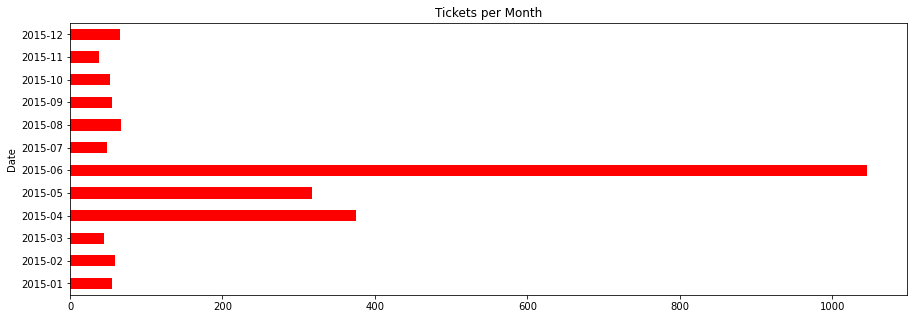

In [9]:
plt.figure(figsize=(15,5))
#plt.subplot(1, 2, 1)
telecom_dataset.groupby(telecom_dataset['Date'].dt.to_period('M'))['Ticket #'].count().plot.barh(color='r')
plt.title('Tickets per Month')
plt.show()

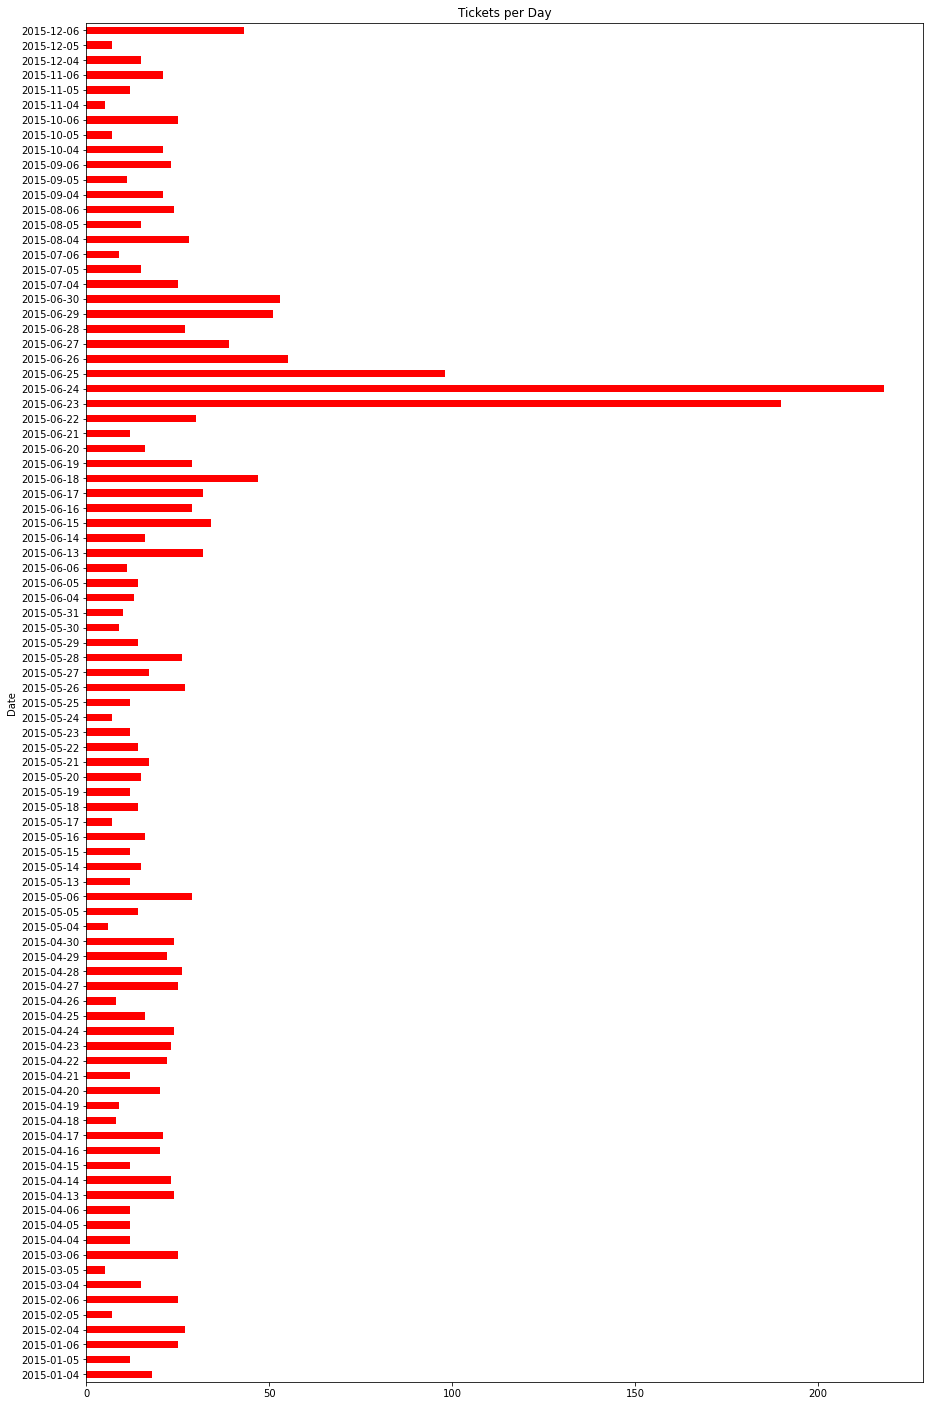

In [10]:
plt.figure(figsize=(15,25))
telecom_dataset.groupby(telecom_dataset['Date'].dt.to_period('D'))['Ticket #'].count().plot.barh(color='r')
plt.title('Tickets per Day')
plt.show()

In [11]:
print(telecom_dataset.groupby(telecom_dataset['Date'].dt.to_period('M'))['Ticket #'].count())

Date
2015-01      55
2015-02      59
2015-03      45
2015-04     375
2015-05     317
2015-06    1046
2015-07      49
2015-08      67
2015-09      55
2015-10      53
2015-11      38
2015-12      65
Freq: M, Name: Ticket #, dtype: int64


In [12]:
print(telecom_dataset.groupby(telecom_dataset['Date'].dt.to_period('D'))['Ticket #'].count())

Date
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-02-04    27
2015-02-05     7
              ..
2015-11-05    12
2015-11-06    21
2015-12-04    15
2015-12-05     7
2015-12-06    43
Freq: D, Name: Ticket #, Length: 91, dtype: int64


### 3. Provide a table with the frequency of complaint types.

In [13]:
# Extracting Complaints from the main dataset
com_dataset = telecom_dataset.iloc[:,1]
com_dataset

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing for Returned Modem
2221                              complaint about comcast
2222               Extremely unsatisfied Comcast customer
2223                 Comcast, Ypsilanti MI Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [14]:
# Apply LDA to extraxt the topics

In [20]:
# Importing libraries
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ThinkPad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
# Functions to preprocess the complaints and extract words roots/stem using Lemmatize and Stem
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [22]:
# Applying the functions on the complaints
com_dataset_cl=[]
ix=0
for ix in com_dataset.index:
    com_dataset_cl.append(preprocess(com_dataset[ix]))

In [23]:
processed_comp = telecom_dataset['Customer Complaint'].map(preprocess)

In [24]:
processed_comp

0               [comcast, cabl, internet, speed]
1       [payment, disappear, servic, disconnect]
2                                [speed, servic]
3         [comcast, impos, usag, punish, stream]
4                  [comcast, work, servic, boot]
                          ...                   
2219                             [servic, avail]
2220     [comcast, monthli, bill, return, modem]
2221                        [complaint, comcast]
2222        [extrem, unsatisfi, comcast, custom]
2223       [comcast, ypsilanti, internet, speed]
Name: Customer Complaint, Length: 2224, dtype: object

In [25]:
# Creating dictionary based on the camplaints data
dictionary = gensim.corpora.Dictionary(processed_comp)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 cabl
1 comcast
2 internet
3 speed
4 disappear
5 disconnect
6 payment
7 servic
8 impos
9 punish
10 stream


In [26]:
# Removing less relevant words
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [27]:
# List of words in the dictionary and indexes
dictionary.token2id.items()

dict_items([('cabl', 0), ('internet', 1), ('speed', 2), ('disconnect', 3), ('servic', 4), ('usag', 5), ('work', 6), ('charg', 7), ('data', 8), ('fee', 9), ('limit', 10), ('overag', 11), ('cap', 12), ('throttl', 13), ('refus', 14), ('outag', 15), ('avail', 16), ('price', 17), ('bill', 18), ('email', 19), ('failur', 20), ('access', 21), ('block', 22), ('complaint', 23), ('equip', 24), ('horribl', 25), ('provid', 26), ('monopoli', 27), ('time', 28), ('custom', 29), ('bundl', 30), ('practic', 31), ('bait', 32), ('switch', 33), ('contract', 34), ('issu', 35), ('unabl', 36), ('xfiniti', 37), ('credit', 38), ('refund', 39), ('slow', 40), ('pay', 41), ('busi', 42), ('promis', 43), ('chang', 44), ('decept', 45), ('connect', 46), ('cancel', 47), ('year', 48), ('fals', 49), ('modem', 50), ('fraudul', 51), ('problem', 52), ('phone', 53), ('terribl', 54), ('account', 55), ('poor', 56), ('unfair', 57), ('advertis', 58), ('home', 59), ('high', 60), ('increas', 61), ('monthli', 62), ('instal', 63), ('

In [28]:
# Convert document (a list of words) into the bag-of-words
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_comp]
bow_corpus[0]

[(0, 1), (1, 1), (2, 1)]

In [29]:
# Applying tf-idf on the bag of words of each complaint
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    print(doc)

[(0, 0.7915833066320321), (1, 0.30795064657307336), (2, 0.5277899846877772)]
[(3, 0.9539436813469973), (4, 0.2999857543586674)]
[(2, 0.8510293535035063), (4, 0.5251181195458828)]
[(5, 1.0)]
[(4, 0.2899807267287351), (6, 0.9570324854078228)]
[(7, 0.3115645176791875), (8, 0.26503387497666264), (9, 0.5216728684651586), (10, 0.5267453679357108), (11, 0.532053880827681)]
[(4, 0.27580470765008697), (8, 0.4229055296172891), (12, 0.6009441797871735), (13, 0.619635997208919)]
[(4, 0.32717348135792135), (14, 0.9449642919688225)]
[(15, 1.0)]
[(16, 0.8420492110121427), (17, 0.5394007102644822)]
[(3, 0.8884766121163975), (4, 0.2793983879000297), (18, 0.3640684696056954)]
[(19, 0.7232712965673053), (20, 0.6905639952689752)]
[(1, 0.20907670767979442), (21, 0.6952127607933599), (22, 0.6877253430955212)]
[(1, 0.5039603466818231), (2, 0.8637267906996613)]
[(1, 0.28502721255623403), (3, 0.9585194250000484)]
[(1, 0.39435988234190555), (23, 0.9189560833898857)]
[(1, 0.25386511348368845), (2, 0.435093953688

[(32, 0.7145750854390285), (33, 0.6995587518356162)]
[]
[(1, 1.0)]
[(0, 0.7595181536352633), (29, 0.6504861061532985)]
[]
[(23, 1.0)]
[(4, 0.6088146769266234), (18, 0.7933124788875637)]
[(1, 0.2661317640850529), (7, 0.5073147583837305), (66, 0.8196374930852266)]
[]
[(8, 0.5755105937711678), (12, 0.8177943240553568)]
[(5, 0.692920685312408), (8, 0.4149510897637911), (12, 0.5896410068592796)]
[(8, 0.29454872411749217), (9, 0.5797676913060832), (12, 0.41855054858783386), (62, 0.6339762704669594)]
[(27, 1.0)]
[(2, 1.0)]
[(1, 0.587331076833098), (18, 0.8093467774607331)]
[]
[]
[(4, 0.32578449776035123), (29, 0.6781929939167112), (37, 0.6587250746869465)]
[(46, 1.0)]
[(1, 0.25386511348368845), (2, 0.4350939536882023), (43, 0.8638551705117486)]
[(1, 0.3010633227329256), (2, 0.5159859486041289), (46, 0.8019472405015853)]
[(13, 1.0)]
[(8, 0.5755105937711678), (12, 0.8177943240553568)]
[(1, 0.28502721255623403), (3, 0.9585194250000484)]
[(4, 0.2899807267287351), (6, 0.9570324854078228)]
[(1, 0.4

In [30]:
# Apply LDA on the corpus_tfidf and List the topics (10) and the correspondent words and weights
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, 
                                             id2word=dictionary, passes=10, workers=4,
                                             random_state=1,chunksize=100,
                                             alpha=0.01, eta=0.01)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \nWord: {}'.format(idx, topic))

Topic: 0 
Word: 0.383*"servic" + 0.229*"cabl" + 0.095*"fraudul" + 0.075*"chang" + 0.073*"switch" + 0.068*"bait" + 0.031*"internet" + 0.024*"bill" + 0.020*"charg" + 0.000*"price"
Topic: 1 
Word: 0.466*"bill" + 0.278*"issu" + 0.096*"servic" + 0.064*"bundl" + 0.048*"email" + 0.038*"limit" + 0.007*"internet" + 0.001*"data" + 0.000*"charg" + 0.000*"failur"
Topic: 2 
Word: 0.260*"speed" + 0.128*"usag" + 0.109*"internet" + 0.085*"cancel" + 0.078*"refus" + 0.078*"account" + 0.056*"data" + 0.053*"credit" + 0.045*"work" + 0.039*"servic"
Topic: 3 
Word: 0.172*"practic" + 0.133*"unfair" + 0.096*"bill" + 0.072*"busi" + 0.066*"decept" + 0.063*"high" + 0.062*"terribl" + 0.059*"monopoli" + 0.058*"advertis" + 0.039*"modem"
Topic: 4 
Word: 0.313*"xfiniti" + 0.284*"price" + 0.098*"pay" + 0.069*"block" + 0.065*"increas" + 0.051*"internet" + 0.049*"monthli" + 0.036*"servic" + 0.032*"speed" + 0.000*"bill"
Topic: 5 
Word: 0.337*"slow" + 0.152*"contract" + 0.109*"internet" + 0.101*"access" + 0.086*"speed" + 0

In [31]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, corpus=corpus_tfidf, dictionary=dictionary, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -11.848789624990932


In [32]:
# Tring out the model
processed_comp[0]

['comcast', 'cabl', 'internet', 'speed']

In [33]:
# Listing the score of the complaint in each topic
lda_model_tfidf[bow_corpus[0]]

[(0, 0.36137557), (2, 0.61281794)]

In [34]:
# Listing the scores of the complaint
[x[1] for x in lda_model_tfidf[bow_corpus[0]]]

[0.36132216, 0.61287135]

In [35]:
# Determining the most relevant Topic
max(lda_model_tfidf[bow_corpus[0]], key=lambda item:item[1])[0]

2

In [36]:
# Checking the words of the most relevant topic
lda_model_tfidf.print_topic(2)

'0.260*"speed" + 0.128*"usag" + 0.109*"internet" + 0.085*"cancel" + 0.078*"refus" + 0.078*"account" + 0.056*"data" + 0.053*"credit" + 0.045*"work" + 0.039*"servic"'

In [37]:
# Classifying the Customer Complaint with the LDA model and cretaing the Topics feature with the number of the suggested topic
topics=[]
topics_desc=[]
ix=0
for ix in telecom_dataset.index:
    relevant = max(lda_model_tfidf[bow_corpus[ix]], key=lambda item:item[1])[0]
    topics.append(relevant)
    topics_desc.append(lda_model_tfidf.print_topic(relevant))
telecom_dataset['Topics']= topics
telecom_dataset['Topics Desc']= topics_desc
telecom_dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Topics,Topics Desc
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet..."
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic..."
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet..."
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet..."
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,8,"0.243*""complaint"" + 0.185*""throttl"" + 0.078*""p..."
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,3,"0.172*""practic"" + 0.133*""unfair"" + 0.096*""bill..."
2221,331188,complaint about comcast,2015-09-06,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,8,"0.243*""complaint"" + 0.185*""throttl"" + 0.078*""p..."
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic..."


###  Chart and table with the frequency of complaint types.

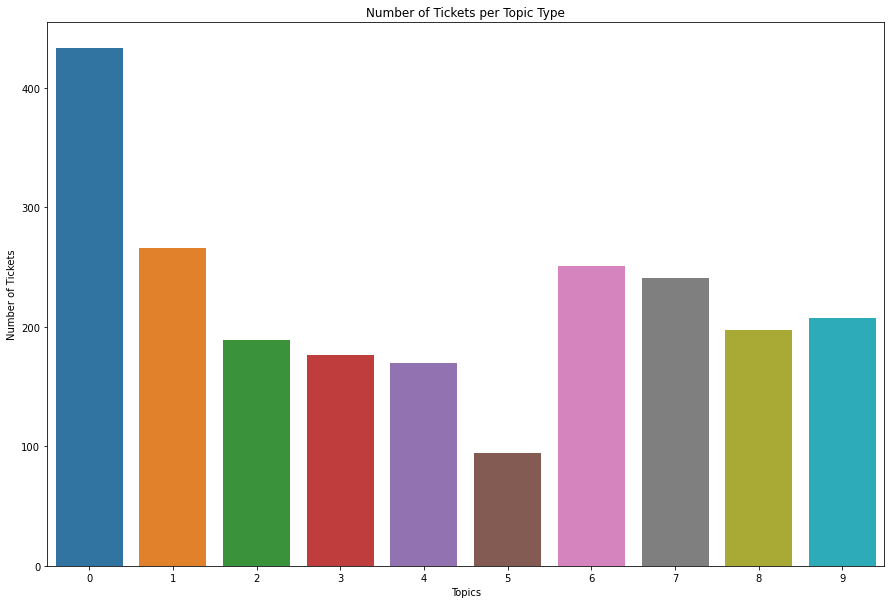

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(x=telecom_dataset['Topics'])
plt.xlabel("Topics")
plt.ylabel("Number of Tickets")
plt.title("Number of Tickets per Topic Type")
plt.show()

In [39]:
telecom_dataset.groupby('Topics')['Ticket #'].count()

Topics
0    433
1    266
2    189
3    176
4    170
5     94
6    251
7    241
8    197
9    207
Name: Ticket #, dtype: int64

In [40]:
# Answering the Question
print('The Complaint type with the most number of tickets is the Topic 0: \n',lda_model_tfidf.print_topic(0))

The Complaint type with the most number of tickets is the Topic 0: 
 0.383*"servic" + 0.229*"cabl" + 0.095*"fraudul" + 0.075*"chang" + 0.073*"switch" + 0.068*"bait" + 0.031*"internet" + 0.024*"bill" + 0.020*"charg" + 0.000*"price"


### 4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [41]:
# Creating Closed and Open features
openstatus=[]
closedstatus=[]
i=0
for i in telecom_dataset.index:
    if (telecom_dataset['Status'][i]=='Open') or (telecom_dataset['Status'][i]=='Pending'):
        openstatus.append(1) 
    else: openstatus.append(0)
    if (telecom_dataset['Status'][i]=='Closed')or(telecom_dataset['Status'][i]=='Solved'):
        closedstatus.append(1) 
    else: closedstatus.append(0)

# Creating Closed and Open features
telecom_dataset['Open'] = openstatus
telecom_dataset['Closed'] = closedstatus
telecom_dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Topics,Topics Desc,Open,Closed
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",0,1
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic...",0,1
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",0,1
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",1,0
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,8,"0.243*""complaint"" + 0.185*""throttl"" + 0.078*""p...",0,1
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,3,"0.172*""practic"" + 0.133*""unfair"" + 0.096*""bill...",0,1
2221,331188,complaint about comcast,2015-09-06,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,8,"0.243*""complaint"" + 0.185*""throttl"" + 0.078*""p...",0,1
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic...",0,1


In [42]:
telecom_dataset.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
Topics                                  int64
Topics Desc                            object
Open                                    int64
Closed                                  int64
dtype: object

### 5. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [43]:
# Extracting datas of the Q3 period
import datetime
q3_dataset=telecom_dataset.loc[(telecom_dataset['Date'] >= datetime.datetime(2015,6,1)) & (telecom_dataset['Date'] <= datetime.datetime(2015,9,30))]
q3_dataset


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Topics,Topics Desc,Open,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic...",0,1
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",1,0
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,6,"0.374*""data"" + 0.181*""cap"" + 0.082*""problem"" +...",1,0
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2,"0.260*""speed"" + 0.128*""usag"" + 0.109*""internet...",0,1
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,4,"0.313*""xfiniti"" + 0.284*""price"" + 0.098*""pay"" ...",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,360946,Comcast unfair pricing,2015-06-24,24-Jun-15,8:32:24 AM,Customer Care Call,York,Pennsylvania,17403,Solved,No,4,"0.313*""xfiniti"" + 0.284*""price"" + 0.098*""pay"" ...",0,1
2216,363852,High Internet & Cable Bill,2015-06-25,25-Jun-15,7:17:21 AM,Customer Care Call,York,Pennsylvania,17404,Solved,Yes,3,"0.172*""practic"" + 0.133*""unfair"" + 0.096*""bill...",0,1
2221,331188,complaint about comcast,2015-09-06,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,8,"0.243*""complaint"" + 0.185*""throttl"" + 0.078*""p...",0,1
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,9,"0.257*""charg"" + 0.211*""custom"" + 0.137*""servic...",0,1


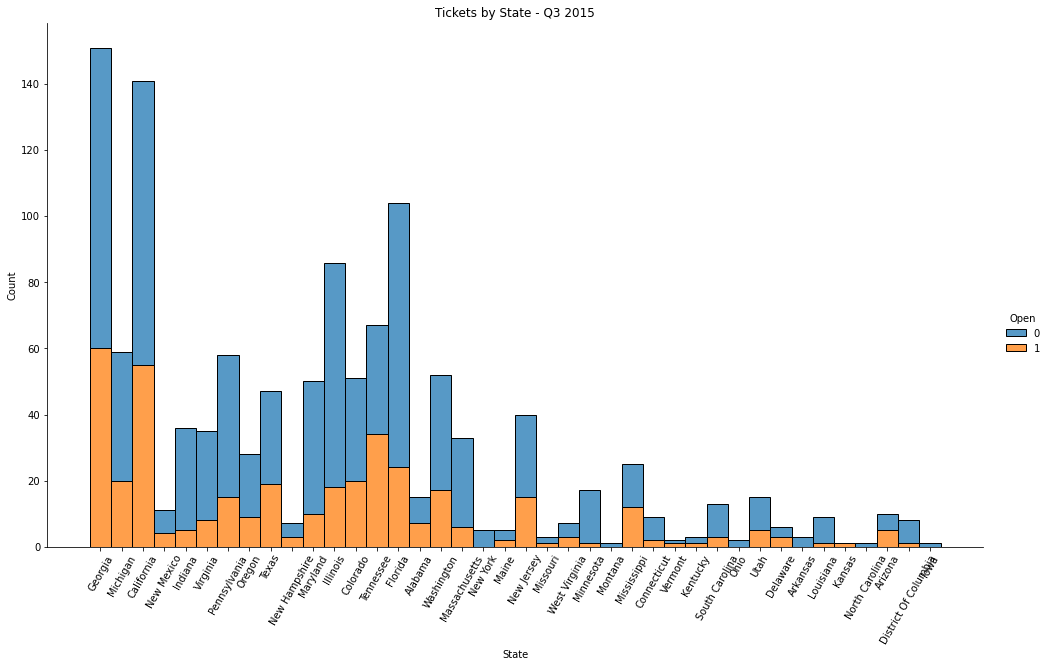

In [44]:
state_tickets = sns.displot(q3_dataset, x="State", hue = "Open",  multiple="stack", 
                   height = 8, aspect=1.75)
state_tickets.set_xticklabels(rotation=60)
plt.title('Tickets by State - Q3 2015')
plt.show()

### Which state has the maximum complaints

In [45]:
max_comp = q3_dataset.groupby('State')['Ticket #'].count().nlargest(1)
print(max_comp)

State
Georgia    151
Name: Ticket #, dtype: int64


### Which state has the highest percentage of unresolved complaints

In [46]:
max_comp_open = (q3_dataset.groupby('State')['Open'].sum()/q3_dataset.groupby('State')['Ticket #'].count()*100).nlargest(1)
print(max_comp_open)

State
Kansas    100.0
dtype: float64


### 6. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [47]:
closed_tickets = telecom_dataset.groupby('Received Via')['Closed'].sum()/telecom_dataset.groupby('Received Via')['Ticket #'].count()*100
print(closed_tickets)

Received Via
Customer Care Call    77.211796
Internet              76.289593
dtype: float64
